#what is regression?

->regression is a method in which you are trying to find a relation between your features(x-variables) & target(y-variable)
->linear regression is a way to find a best fit line that predicts numerical value of target.
->regression having single feature is called simple regression.
->a model built on all of your features is called a full model, a model built on no features is your null model.

steps to perform
1. load all necessary libraries
2. load the dataset
3. checking datatypes
4. 5-point summary 
4. uni-variate
5. bi-variate
6. multi-variate analysis
7. Missing value treatments
8. Outliers treatments
9. Transformation-Encoding
10. scaling
11. feature engg.(create new features from existing features)
12. train test split
13. fit your base model(OLS)
14. test for assumptions:
        * target should be numeric
        * Linear relationship must exist between f and T.(.corr(),after building the model plot residuals(errors) vs your feature using scatterplot if there is a pattern that comesup then there is no linear relationship and if there is no pattern there is linear relationship)
        * Multicollinearity: relation between your independent variables(x-variables),.corr() and CN>1000
        * Autocorrelation: the next rows are dependent of previous rows, residulas to have a correlation. DW 0-4
        <1.5- positive autocorrelation
        >2.5- negative autocorrelation
        1.5-2.5- no auto corrlation
         *Residuals(errors) are normally distributed. JB test
         p(JB)<0.05 to state residuals are not normal.
         Kurtosis is not mesokurtic
         p(JB)>0.05 to state resiuals are normal. Kurtois is not mesokurtic.
         * Homoskedasticity:the variance of residuals against fitted values(predicted values) of target is constant. Heteroskedasticity means the variance is not constant.
         Bp-quant test, gold-f quand test.
         
* test the perfromance of model against training data and test data.
-rmse
-mae
-mape
if the train score is high i.e. less error in training data and more error in testing data then the model is said to be overfit
if the train score as well as the test score is low ie. high train and test errors then model is said to be underfit.

incase of overfitting we can perform regularization:
* ridge(L2) : it will reduce the coefficient(slope) of insignificant variables close to zero
* lasso(L1) : it will make the coefficient of insignificant variable as zero.(feature selection technique)
* elasticnet: a combination of L1 and L2 penalty


Forward feature selection(SFS):
create a null model fist and then add a new significant feature in each iteration

Backward feature elemination(SFS,RFE):
creates a full model first and then removes insignificant features on by one

y=m1x1+m2x2+c+e
y=0(20)+10(10)+c+e

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer,LabelEncoder,OrdinalEncoder,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS #you have to fit a constant to get an intercept
from sklearn.linear_model import LinearRegression #the constant is added by default you get an intercept.
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import SGDRegressor

#constant helps in finding the intercept which inturn helps in finding the value of the target variable if all the x values are zero.
#slope helps us to determine the effect of unit change in current x-variable to your target


In [73]:
data=pd.read_csv(r'C:\Users\Bhushan Palav\Downloads\Cellphone.csv')

In [74]:
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


#univariate analysis
* histograms
* kdeplots
* boxplots
* skewness
* kurtosis

In [13]:
df=data

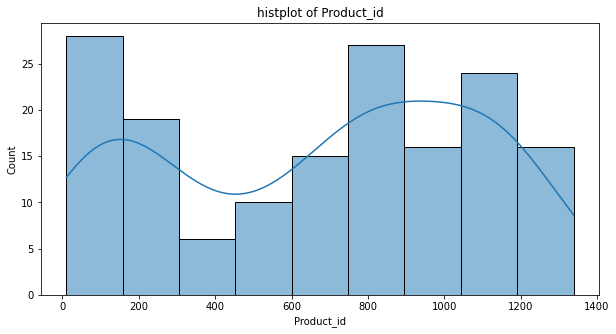

skewness of Product_id is -0.21686938484741747
kurtosis of Product_id is -1.3187614993089989


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


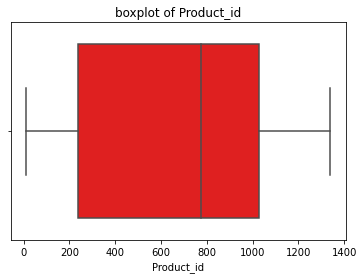

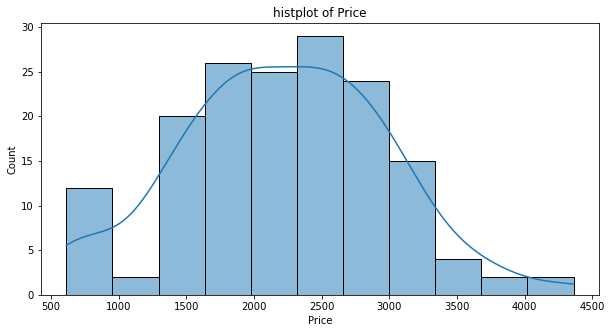

skewness of Price is 0.05234678230116894
kurtosis of Price is -0.05631901638133696


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


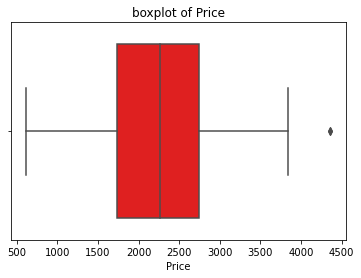

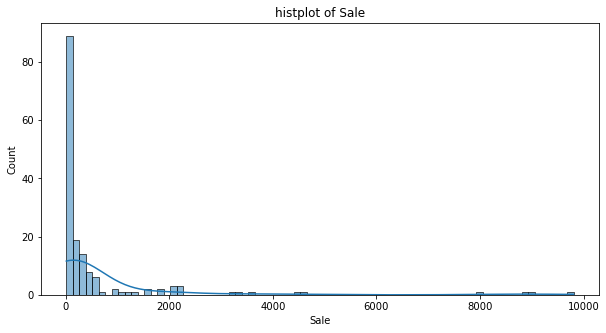

skewness of Sale is 4.2693840983179445
kurtosis of Sale is 19.734446744841943


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


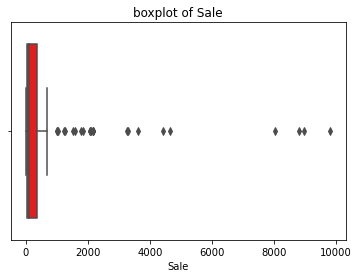

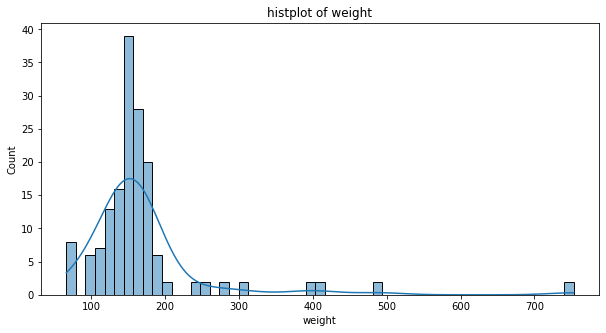

skewness of weight is 3.981756060198998
kurtosis of weight is 19.963653856781768


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


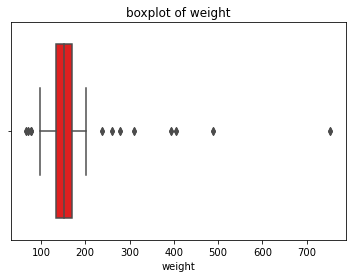

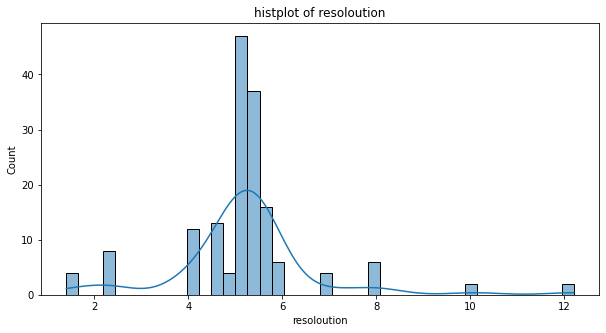

skewness of resoloution is 1.1761101196508716
kurtosis of resoloution is 6.595614498502477


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


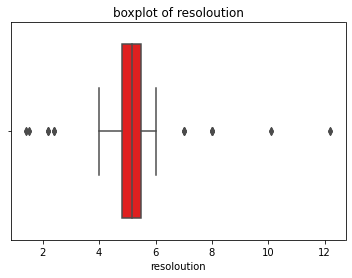

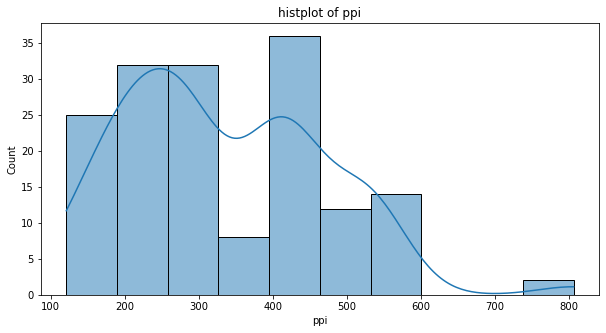

skewness of ppi is 0.6025028092508479
kurtosis of ppi is 0.2822897588486857


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


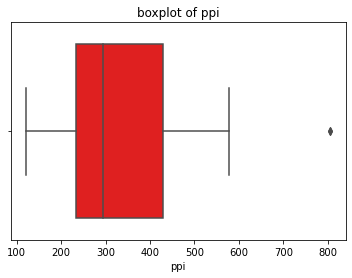

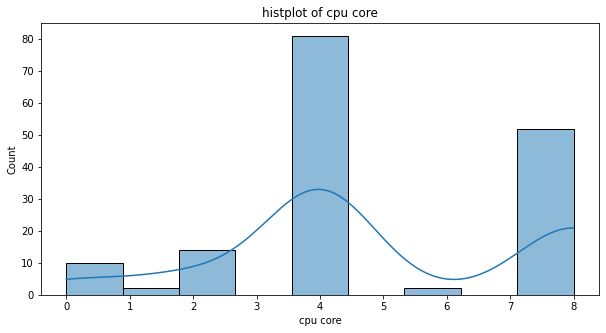

skewness of cpu core is -0.009077116452651475
kurtosis of cpu core is -0.8634294489459844


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


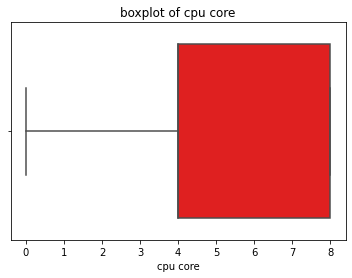

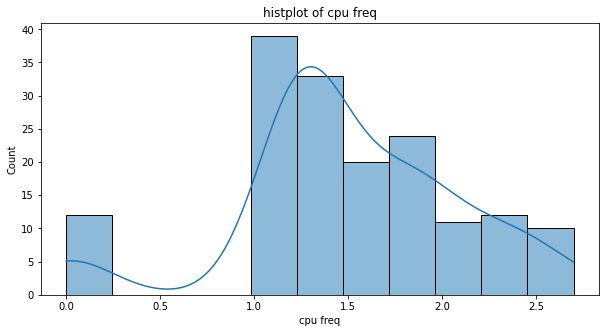

skewness of cpu freq is -0.5126630811185897
kurtosis of cpu freq is 0.876112142842655


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


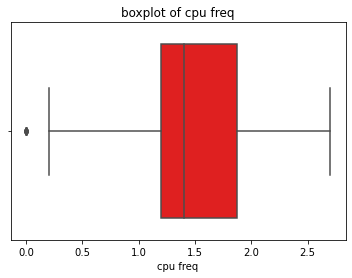

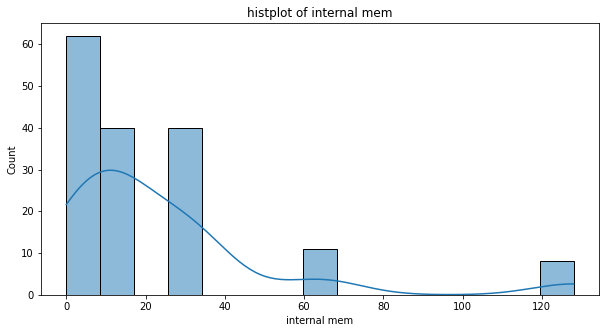

skewness of internal mem is 2.3896825866645997
kurtosis of internal mem is 5.954205698349681


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


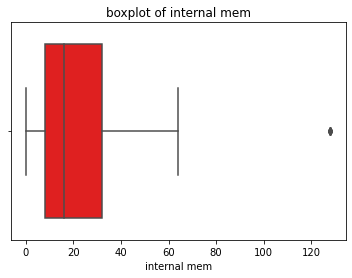

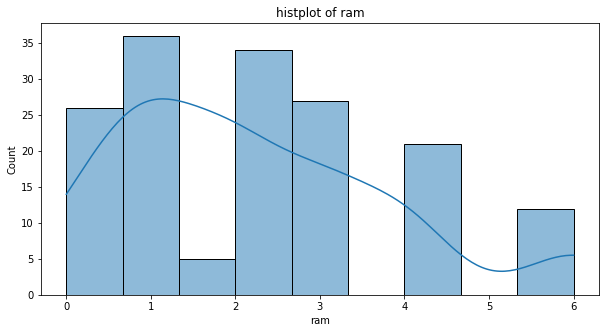

skewness of ram is 0.7926980073740476
kurtosis of ram is 0.04436743547704314


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


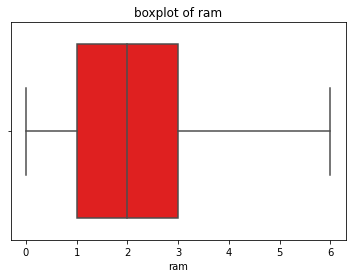

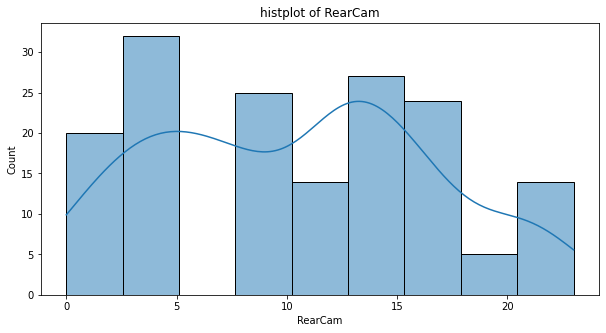

skewness of RearCam is 0.1069292938431428
kurtosis of RearCam is -0.9605745072419958


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


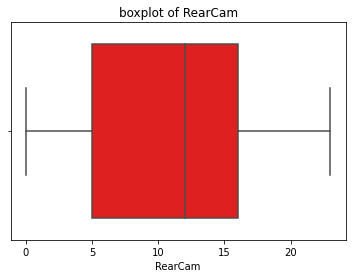

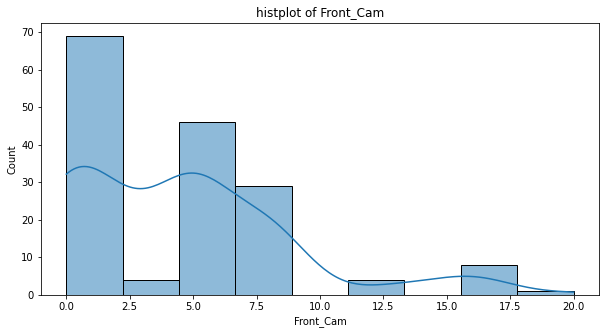

skewness of Front_Cam is 1.1697495413305683
kurtosis of Front_Cam is 1.355740292262924


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


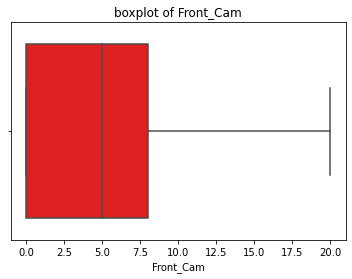

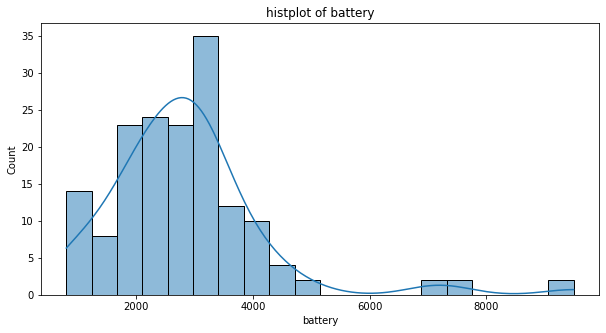

skewness of battery is 2.0926598466076736
kurtosis of battery is 7.57072784851174


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


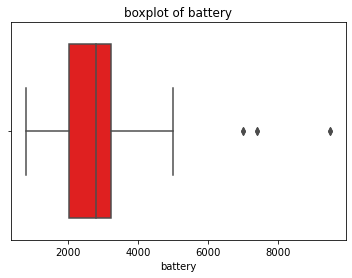

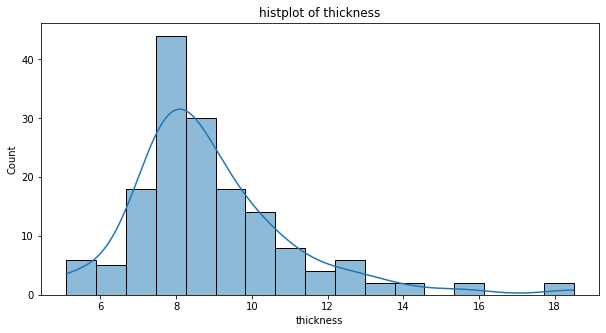

skewness of thickness is 1.5876799080340545
kurtosis of thickness is 4.298591436635036


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


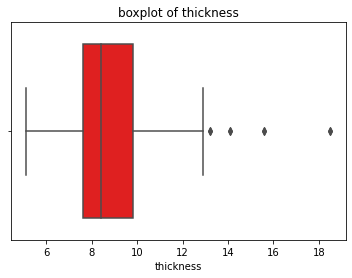

In [14]:
for col in df.columns[df.dtypes!=object]:
    plt.figure(figsize=(10,5))
    plt.title(f"histplot of {col}")
    sns.histplot(df[col],kde=True)
    plt.show()
    plt.title(f"boxplot of {col}")
    sns.boxplot(df[col],color="r")
    print(f"skewness of {col} is {df[col].skew()}")
    print(f"kurtosis of {col} is {df[col].kurtosis()}")
    plt.show()

if kurtosis is -ve for .kurt() its platykurtic

if kurtosis is 0 its mesokurtic

if kurtosis is +ve its leptokurtic

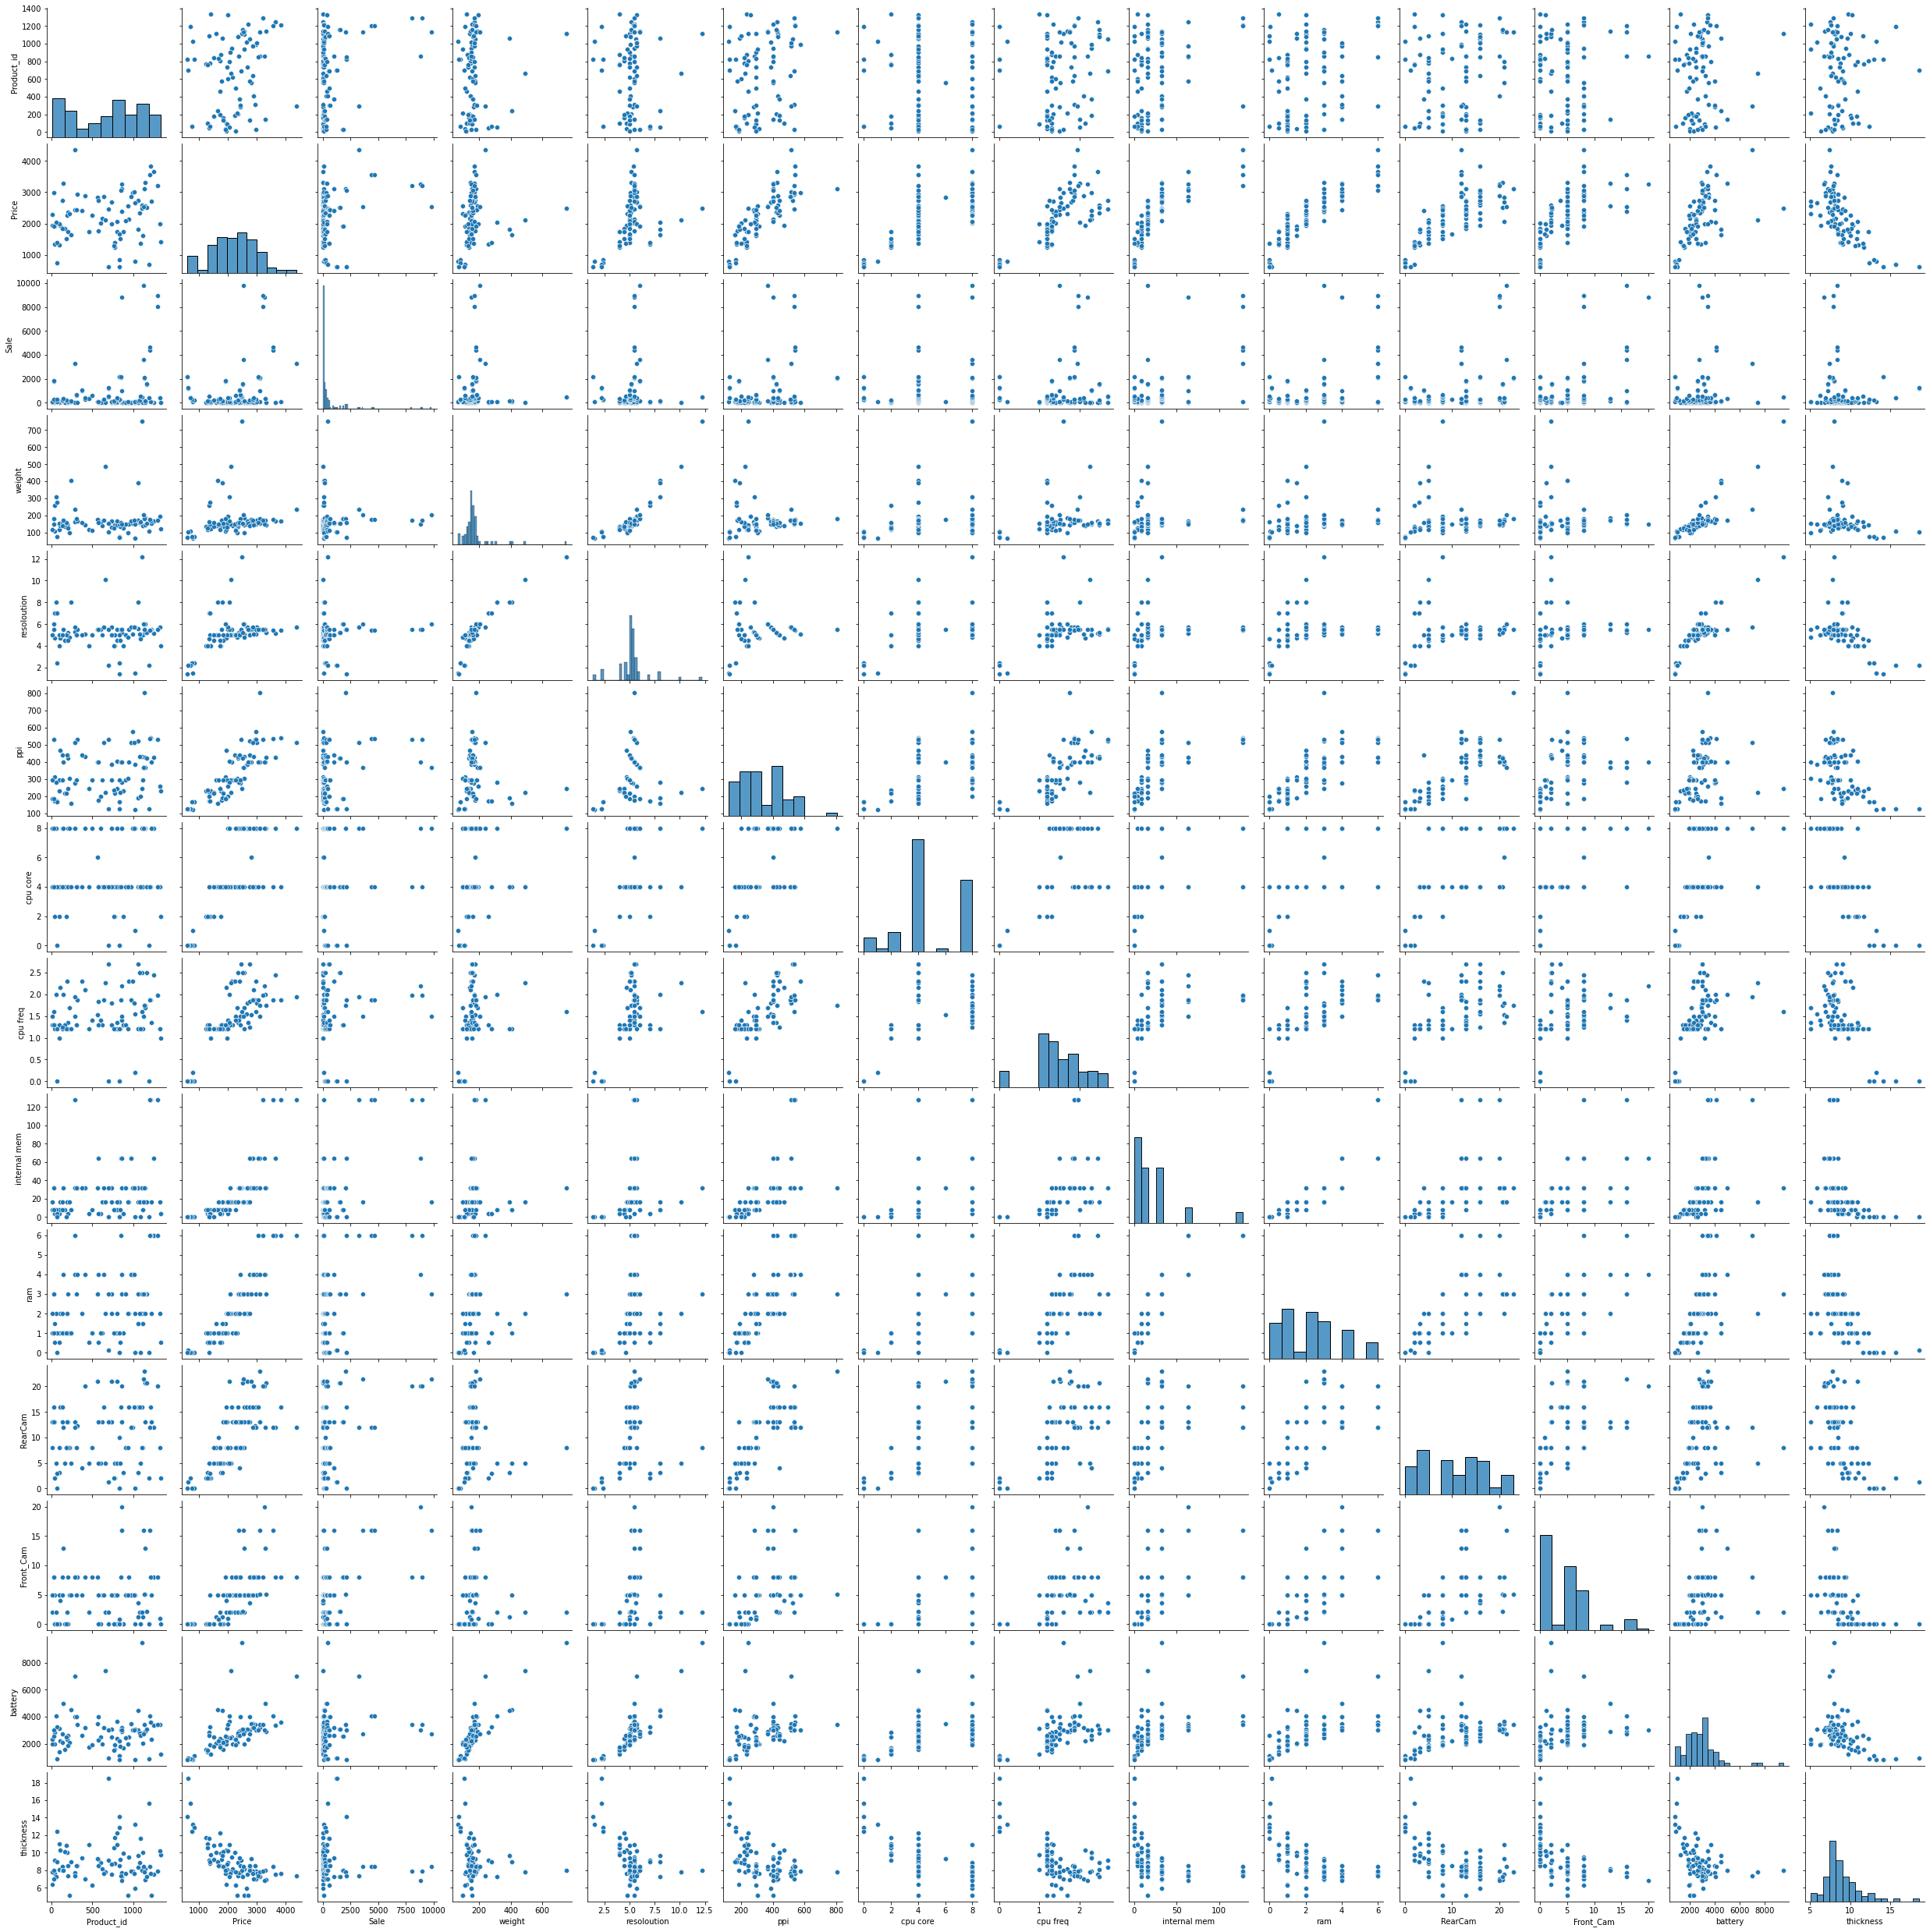

In [15]:
sns.pairplot(df)

<AxesSubplot:>

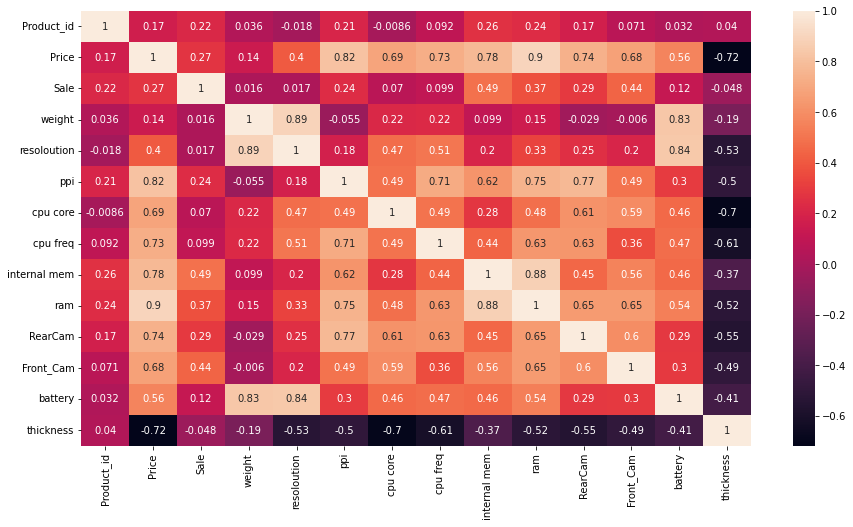

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)


In [17]:
skew_cols=df.skew()[(df.skew()>0.9 )| (df.skew()<-0.9)].index

In [18]:
df[skew_cols].describe()

,Sale,weight,resoloution,internal mem,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,621.465839,170.426087,5.209938,24.501714,4.503106,2842.111801,8.921739
std,1546.618517,92.888612,1.509953,28.804773,4.342053,1366.990838,2.192564
min,10.000000,66.000000,1.400000,0.000000,0.000000,800.000000,5.100000
25%,37.000000,134.100000,4.800000,8.000000,0.000000,2040.000000,7.600000
50%,106.000000,153.000000,5.150000,16.000000,5.000000,2800.000000,8.400000
75%,382.000000,170.000000,5.500000,32.000000,8.000000,3240.000000,9.800000
max,9807.000000,753.000000,12.200000,128.000000,20.000000,9500.000000,18.500000


if the lowest value in skewed column is >0 it can be transformed using box-cox or log
if the lowest value in skewed column is ==0 it can be transformed using log1p

**** VIP note:
    first split the data in train and test sets
    fit the transformer and scaler on train set
    transfrom the train first then transform the test later using the same fit this avoids data leakage

In [21]:
#transformation is used to make the data normal
#scaling will not change the disribution

In [76]:
pt=PowerTransformer(method='box-cox')
pt.fit(df[['Sale']])
df['sale_bc']=pt.transform(df[['Sale']])


(array([10., 17., 16., 20., 26., 18., 23., 10., 12.,  9.]),
 array([-1.88177283, -1.48711011, -1.0924474 , -0.69778468, -0.30312197,
         0.09154075,  0.48620347,  0.88086618,  1.2755289 ,  1.67019161,
         2.06485433]),
 <BarContainer object of 10 artists>)

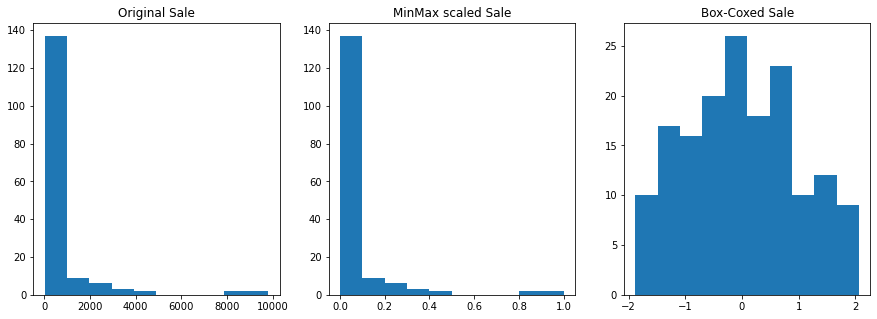

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(df['Sale'])
plt.title('Original Sale')
plt.subplot(1,3,2)
plt.title('MinMax scaled Sale')
plt.hist(df['Sale_mm'])
plt.subplot(1,3,3)
plt.title('Box-Coxed Sale')
plt.hist(df['sale_bc'])

In [25]:
#scaling if the data that is to be scaled is normally distributed use standscaler(mean==0 and std==1)
#if data is not normal try minmax scaler or robustscaler


->split your data in train and test
->fit transformation and scaling wherever required on train data
->tranfrom you train and test using the same fit


In [248]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [249]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=1)

In [220]:
xtrain.drop(columns=['Sale','Sale_mm'],inplace=True)

In [84]:
model=OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1172.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                   6.28e-109
Time:                        10:27:33   Log-Likelihood:                         -805.78
No. Observations:                 120   AIC:                                      1638.
Df Residuals:                     107   BIC:                                      1674.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Product_id       0.0808      0.054      1.487      0.140      -0.027       0.189
weight          -4.6365      0.808     -5.739      0.000      -6.238      -3.035
resoloution    222.5126     40.092      5.550      0.000     143.035     301.991
ppi              1.4759      0.291      5.080      0.000       0.900       2.052
cpu core        63.4286     13.824      4.588      0.000      36.024      90.833
cpu freq        63.0253     65.728      0.959      0.340     -67.273     193.324
internal mem     5.5942      1.617      3.460      0.001       2.389       8.800
ram            103.9434     35.201      2.953      0.004      34.161     173.726
RearCam         -8.0274      6.030     -1.331      0.186     -19.980       3.925
Front_Cam        4.6311      7.674      0.604      0.547     -10.581      19.843
battery          0.1646      0.046      3.560      0.001       0.073       0.256
thickness       12.8552      6.740      1.907      0.059      -0.507      26.217
sale_bc          9.3246     22.289      0.418      0.677     -34.860      53.509
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.512
Skew:                          -0.132   Prob(JB):                        0.774
Kurtosis:                       3.180   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
5.31e-07>0


True

In [29]:
residuals=model.resid

In [30]:
ypred=model.predict(xtrain)

In [31]:
ypred

33     2733.889633
59     1517.059198
73     3142.631278
111    2930.561923
66     2891.415457
          ...     
133    2269.234194
137    3141.542853
72     2214.538649
140     404.105921
37     2206.850200
Length: 120, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

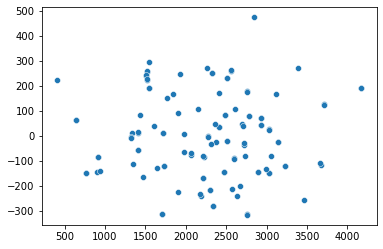

In [32]:
sns.scatterplot(ypred,residuals)

In [33]:
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt

In [34]:
het_goldfeldquandt(ytrain,xtrain)

(0.6874532317485863, 0.8936942056874377, 'increasing')

#since pval of fstats <0.05 we reject the null hypothesis and there is atleast 1 significant feature in the model

#r2 value is the explained variation for your target. r2 will always increase when you add a new variable(feature) in the model. adj.r2 will decrease if the new feature that was added was not contributing towards the prediction. if there is a gap between r2 and adj.r2 this might indicate presence of non-contributing features which can be removed from the model.

#cn gives info about multicollinearity. cn>1000 indicates severe multicollinearity; 100-1000 indicates moderate multicollinearity <100 indicates no multicollinearity.


#>0.05 so null hypothesis is not rejected and residuals are normally disributed

#dw 1.9 indicates no auto correlation

#if heteroskedasticity is present then try to transform the target variable in train and test

#if there is autocorrelation present try stuffling the records this might remove autocorrelation.

homoskedasticity is a state wherein the resid when plotted against fitted values will have equal variance throughout the fitted values.

In [85]:
#fixing multicollinearity
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns

In [86]:
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
2,123.991867,resoloution
1,63.717181,weight
10,58.430114,battery
3,31.245004,ppi
5,30.060934,cpu freq
7,26.823825,ram
4,15.688968,cpu core
8,14.873333,RearCam
6,11.115839,internal mem
11,10.238480,thickness


In [87]:
xtrain.drop(columns='resoloution',inplace=True)

In [88]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
9,57.901769,battery
2,31.244643,ppi
1,31.184832,weight
6,26.686647,ram
4,20.862444,cpu freq
7,14.823599,RearCam
3,12.988950,cpu core
5,11.109026,internal mem
10,7.430318,thickness
8,5.792395,Front_Cam


In [89]:
xtrain.drop(columns='battery',inplace=True)

In [90]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
2,31.135183,ppi
6,25.380787,ram
4,20.768738,cpu freq
7,14.721562,RearCam
3,11.639007,cpu core
5,10.054029,internal mem
9,7.260036,thickness
1,6.121529,weight
8,5.701743,Front_Cam
0,4.498981,Product_id


In [91]:
xtrain.drop(columns='ppi',inplace=True)

In [92]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
5,25.042619,ram
3,16.671990,cpu freq
6,11.945362,RearCam
2,11.270912,cpu core
4,9.768027,internal mem
8,5.851733,thickness
1,5.658679,weight
7,5.650297,Front_Cam
0,4.486381,Product_id
9,1.280353,sale_bc


In [93]:
xtrain.drop(columns='ram',inplace=True)

In [94]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
3,15.281256,cpu freq
2,11.263922,cpu core
5,10.532544,RearCam
7,5.745931,thickness
1,5.514291,weight
6,5.385514,Front_Cam
0,4.486231,Product_id
4,3.557591,internal mem
8,1.273984,sale_bc


In [95]:
xtrain.drop(columns='cpu freq',inplace=True)

In [96]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
2,10.705200,cpu core
4,7.720360,RearCam
5,5.303529,Front_Cam
6,5.291489,thickness
1,5.003237,weight
0,4.486205,Product_id
3,3.183645,internal mem
7,1.110165,sale_bc


In [97]:
xtrain.drop(columns='cpu core',inplace=True)

In [98]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
3,5.398137,RearCam
5,5.254209,thickness
0,4.448491,Product_id
4,4.196835,Front_Cam
1,3.679969,weight
2,3.016526,internal mem
6,1.092567,sale_bc


In [99]:
xc=sm.add_constant(xtrain)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [100]:
model=OLS(ytrain,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     147.9
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.56e-53
Time:                        10:30:01   Log-Likelihood:                -829.47
No. Observations:                 120   AIC:                             1675.
Df Residuals:                     112   BIC:                             1697.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2460.8341    176.677     13.928      0.000    2110.772    2810.896
Product_id      -0.0594      0.061     -0.973      0.333      -0.180       0.062
weight           0.4727      0.258      1.832      0.070      -0.038       0.984
internal mem    13.0396      1.004     12.984      0.000      11.050      15.029
RearCam         38.0086      4.911      7.740      0.000      28.279      47.738
Front_Cam       11.3041      7.977      1.417      0.159      -4.501      27.109
thickness     -116.5594     14.145     -8.240      0.000    -144.586     -88.533
sale_bc         -6.1804     24.910     -0.248      0.805     -55.536      43.175
==============================================================================
Omnibus:                        3.090   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.748
Skew:                           0.200   Prob(JB):                        0.253
Kurtosis:                       3.624   Cond. No.                     6.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
xtrain.drop(columns='RearCam',inplace=True)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
4,5.077350,thickness
0,4.299521,Product_id
1,3.580409,weight
3,3.041891,Front_Cam
2,2.981043,internal mem
5,1.082151,sale_bc


In [103]:
xtrain.drop(columns='thickness',inplace=True)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
3,2.970330,Front_Cam
2,2.913379,internal mem
0,2.798572,Product_id
1,2.767565,weight
4,1.075733,sale_bc


In [57]:
import statsmodels.api as sm

In [104]:
xc=sm.add_constant(xtrain)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [105]:
model=OLS(ytrain,xc).fit()

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.70e-30
Time:                        10:31:08   Log-Likelihood:                -891.28
No. Observations:                 120   AIC:                             1795.
Df Residuals:                     114   BIC:                             1811.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1434.4254    110.894     12.935      0.000    1214.745    1654.106
Product_id      -0.0911      0.099     -0.916      0.361      -0.288       0.106
weight           1.0344      0.415      2.495      0.014       0.213       1.856
internal mem    15.3915      1.643      9.369      0.000      12.137      18.646
Front_Cam       68.1842     11.443      5.959      0.000      45.517      90.852
sale_bc        -69.9460     39.822     -1.756      0.082    -148.832       8.940
==============================================================================
Omnibus:                        1.222   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                1.171
Skew:                          -0.107   Prob(JB):                        0.557
Kurtosis:                       2.566   Cond. No.                     2.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
2.36e+03


2360.0

In [62]:
xtrain.drop(columns='RearCam',inplace=True)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
4,5.089345,thickness
0,4.355545,Product_id
1,3.616955,weight
3,3.124904,Front_Cam
2,3.112698,internal mem
5,2.245639,Sale_mm
6,1.586151,sale_bc


In [63]:
xtrain.drop(columns='thickness',inplace=True)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
3,3.060791,Front_Cam
2,3.035729,internal mem
0,2.886125,Product_id
1,2.789225,weight
4,2.240346,Sale_mm
5,1.573044,sale_bc


In [64]:
xc=sm.add_constant(xtrain)
model=OLS(ytrain,xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     53.89
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           6.59e-31
Time:                        10:17:39   Log-Likelihood:                -887.99
No. Observations:                 120   AIC:                             1790.
Df Residuals:                     113   BIC:                             1809.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1431.9458    108.378     13.213      0.000    1217.229    1646.662
Product_id      -0.0548      0.098     -0.558      0.578      -0.249       0.140
weight           0.9674      0.406      2.383      0.019       0.163       1.772
internal mem    16.2142      1.638      9.897      0.000      12.968      19.460
Front_Cam       72.8270     11.333      6.426      0.000      50.374      95.280
Sale_mm       -925.9599    367.039     -2.523      0.013   -1653.130    -198.790
sale_bc         -4.8850     46.686     -0.105      0.917     -97.378      87.608
==============================================================================
Omnibus:                        0.951   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.979
Skew:                          -0.088   Prob(JB):                        0.613
Kurtosis:                       2.594   Cond. No.                     7.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
7.99e+03


7990.0

In [66]:

model=OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              253.0
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    1.97e-63
Time:                        10:19:28   Log-Likelihood:                         -944.04
No. Observations:                 120   AIC:                                      1900.
Df Residuals:                     114   BIC:                                      1917.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Product_id       0.7043      0.127      5.566      0.000       0.454       0.955
weight           4.1589      0.518      8.024      0.000       3.132       5.186
internal mem    14.2228      2.591      5.489      0.000       9.090      19.356
Front_Cam      129.8992     16.641      7.806      0.000      96.934     162.865
Sale_mm       -969.9407    582.927     -1.664      0.099   -2124.714     184.833
sale_bc       -110.4359     73.056     -1.512      0.133    -255.158      34.287
==============================================================================
Omnibus:                       31.396   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.200
Skew:                          -1.266   Prob(JB):                     3.42e-11
Kurtosis:                       4.797   Cond. No.                     7.99e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
xtrain.drop(columns='Front_Cam',inplace=True)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['attributes']=xtrain.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
0,2.855740,Product_id
1,2.651648,weight
2,2.218597,internal mem
3,2.174132,Sale_mm
4,1.557906,sale_bc


In [69]:
xc=sm.add_constant(xtrain)
model=OLS(ytrain,xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     41.68
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           3.25e-24
Time:                        10:21:42   Log-Likelihood:                -906.68
No. Observations:                 120   AIC:                             1825.
Df Residuals:                     114   BIC:                             1842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1697.3985    116.568     14.561      0.000    1466.479    1928.318
Product_id      -0.1470      0.113     -1.300      0.196      -0.371       0.077
weight           0.8063      0.471      1.710      0.090      -0.128       1.740
internal mem    21.6118      1.636     13.207      0.000      18.370      24.854
Sale_mm       -542.9439    421.340     -1.289      0.200   -1377.616     291.728
sale_bc        -12.1258     54.298     -0.223      0.824    -119.690      95.438
==============================================================================
Omnibus:                        2.344   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.667
Skew:                          -0.060   Prob(JB):                        0.435
Kurtosis:                       2.435   Cond. No.                     7.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
xtrain.shape[0]

120

In [108]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(xc.values, i) for i in range(xc.shape[1])]
vif['attributes']=xc.columns
vif.sort_values(by=['vif'],ascending=False)

,vif,attributes
0,8.470472,const
3,1.689606,internal mem
4,1.547012,Front_Cam
5,1.126004,sale_bc
1,1.065797,Product_id
2,1.034109,weight


In [110]:
xc=sm.add_constant(xtrain)
model=OLS(ytrain,xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.70e-30
Time:                        10:38:27   Log-Likelihood:                -891.28
No. Observations:                 120   AIC:                             1795.
Df Residuals:                     114   BIC:                             1811.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1434.4254    110.894     12.935      0.000    1214.745    1654.106
Product_id      -0.0911      0.099     -0.916      0.361      -0.288       0.106
weight           1.0344      0.415      2.495      0.014       0.213       1.856
internal mem    15.3915      1.643      9.369      0.000      12.137      18.646
Front_Cam       68.1842     11.443      5.959      0.000      45.517      90.852
sale_bc        -69.9460     39.822     -1.756      0.082    -148.832       8.940
==============================================================================
Omnibus:                        1.222   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                1.171
Skew:                          -0.107   Prob(JB):                        0.557
Kurtosis:                       2.566   Cond. No.                     2.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
xtrain.drop('Product_id',axis=1,inplace=True)

In [114]:
xc=sm.add_constant(xtrain)
model=OLS(ytrain,xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     75.58
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.77e-31
Time:                        10:43:06   Log-Likelihood:                -891.72
No. Observations:                 120   AIC:                             1793.
Df Residuals:                     115   BIC:                             1807.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1374.4700     89.477     15.361      0.000    1197.232    1551.708
weight           1.0296      0.414      2.485      0.014       0.209       1.850
internal mem    15.0809      1.606      9.388      0.000      11.899      18.263
Front_Cam       69.4969     11.345      6.126      0.000      47.025      91.969
sale_bc        -73.0626     39.648     -1.843      0.068    -151.598       5.473
==============================================================================
Omnibus:                        2.607   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.168
Skew:                          -0.205   Prob(JB):                        0.338
Kurtosis:                       2.484   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
ytrain_pred=model.predict(xc)
print('rmse',mean_squared_error(ytrain,ytrain_pred,squared=False))

408.3200774572232

In [123]:
xtest=xtest[xtrain.columns]
ytest_pred=model.predict(sm.add_constant(xtest))
print('rmse',mean_squared_error(ytest,ytest_pred,squared=False))

rmse 419.2126992659716


In [ ]:
#GridSearch CV:
* its used to find proper values for the arguments from the set of arguments passed

In [137]:
rid=Ridge()
params={'alpha':[0.1,0.2,2.0,0.01,0.02]}

In [140]:
grd=GridSearchCV(estimator=rid,param_grid=params,cv=5)
grd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 2.0, 0.01, 0.02]})

In [141]:
grd.best_params_

{'alpha': 2.0}

In [143]:
ridge=Ridge(alpha=2.0)
ridge_model=ridge.fit(xtrain,ytrain)

In [145]:
ridge_model.coef_

array([  1.02819617,  15.07759941,  69.37013774, -71.7387546 ])

In [155]:
ytrain_pred_rd=ridge_model.predict(xtrain)
mean_squared_error(ytrain,ytrain_pred_rd,squared=False)

408.3221961996511

In [156]:
ytest_pred_rd=ridge_model.predict(xtest)
mean_squared_error(ytest,ytest_pred_rd,squared=False)

419.56929852499997

In [146]:
lass=Lasso()
params={'alpha':[0.1,0.2,2.0,0.01,0.02]}
grd=GridSearchCV(estimator=lass,param_grid=params)
grd.fit(xtrain,ytrain)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 2.0, 0.01, 0.02]})

In [147]:
grd.best_params_

{'alpha': 2.0}

In [148]:
ls=Lasso(alpha=2.0)
ls_model=ls.fit(xtrain,ytrain)

In [150]:
ls_model.coef_

array([  1.0271225 ,  15.07316579,  69.28936406, -70.83067369])

In [153]:
ytrain_pred_ls=ls_model.predict(xtrain)
mean_squared_error(ytrain,ytrain_pred_ls,squared=False)

408.3260765555626

In [154]:
ytest_pred_ls=ls_model.predict(xtest)
mean_squared_error(ytest,ytest_pred_ls,squared=False)

419.8192876246595

In [161]:
en=ElasticNet()
params={'alpha':[1.0,2.0,0.1,0.2,0.01,0.02],
    'l1_ratio':[0.5,0.25,0.75,0.3]}
grd=GridSearchCV(estimator=en,param_grid=params,cv=5)

In [162]:
grd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1.0, 2.0, 0.1, 0.2, 0.01, 0.02],
                         'l1_ratio': [0.5, 0.25, 0.75, 0.3]})

In [163]:
grd.best_params_

{'alpha': 1.0, 'l1_ratio': 0.75}

In [165]:
en=ElasticNet(alpha=1.0,l1_ratio=0.75)
en_model=en.fit(xtrain,ytrain)

In [166]:
en_model.coef_

array([  1.01172638,  15.05978036,  67.63809684, -56.50695561])

In [167]:
ytrain_pred_en=en_model.predict(xtrain)
mean_squared_error(ytrain,ytrain_pred_en,squared=False)

408.66186314136536

In [168]:
ytest_pred_en=en_model.predict(xtest)
mean_squared_error(ytest,ytest_pred_en,squared=False)

423.8042498971509

#feature selection is a technique to reduce the number of features in model and only select the most contributing features.

In [172]:
xtrain.shape[1]

4

In [171]:
lr=LinearRegression()

In [209]:
sfs=SequentialFeatureSelector(estimator=lr,n_features_to_select=0.75,direction='backward')
sfs.fit(xtrain,ytrain)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=0.75)

In [210]:
backward_sfs_features=sfs.get_feature_names_out()


In [211]:
backward_sfs_features

array(['internal mem', 'Front_Cam'], dtype=object)

In [212]:
xtrain=xtrain[backward_sfs_features]

In [213]:
backward_model=lr.fit(xtrain,ytrain)
ytrain_pred_bfs=backward_model.predict(xtrain)
ytest_pred_bfs=backward_model.predict(xtest[backward_sfs_features])

In [214]:
mean_squared_error(ytrain,ytrain_pred_bfs,squared=False)

423.80592162189726

In [215]:
mean_squared_error(ytest,ytest_pred_bfs,squared=False)

437.5668639829487

In [221]:
xtrain.columns

Index(['Product_id', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness',
       'sale_bc'],
      dtype='object')

In [223]:
sfs=SequentialFeatureSelector(estimator=lr,direction='forward')
sfs.fit(xtrain,ytrain)

SequentialFeatureSelector(estimator=LinearRegression())

In [224]:
sfs.get_feature_names_out()

array(['ppi', 'cpu core', 'internal mem', 'ram', 'battery', 'thickness'],
      dtype=object)

In [225]:
sfs=SequentialFeatureSelector(estimator=lr,direction='backward')
sfs.fit(xtrain,ytrain)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [226]:
sfs.get_feature_names_out()

array(['ppi', 'cpu core', 'internal mem', 'ram', 'battery', 'thickness'],
      dtype=object)

In [227]:
rfe=RFE(estimator=lr)
rfe.fit(xtrain,ytrain)

RFE(estimator=LinearRegression())

In [228]:
rfe.get_feature_names_out()

array(['resoloution', 'cpu core', 'cpu freq', 'ram', 'RearCam',
       'thickness'], dtype=object)

In [251]:
xtrain_non_mul=xtrain[['weight','internal mem','Front_Cam','sale_bc']]

In [258]:
sgdr=SGDRegressor()
sgd_model=sgdr.fit(xtrain_non_mul,ytrain)

In [253]:
ytrain_pred_sgd=sgd_model.predict(xtrain_non_mul)
ytest_pred_sgd=sgd_model.predict(xtest[xtrain_non_mul.columns])

In [254]:
mean_squared_error(ytrain,ytrain_pred_sgd,squared=False)

37775197128467.54

In [256]:
mean_squared_error(ytest,ytest_pred_sgd,squared=False)

40608896345898.664

In [259]:
params={'penalty':['l1','l2'],'l1_ratio':[0.015,0.15,0.75,0.25,0.5]}

In [263]:
grd=GridSearchCV(estimator=sgdr,param_grid=params,cv=5,scoring='r2')
grd.fit(xtrain_non_mul,ytrain)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'l1_ratio': [0.015, 0.15, 0.75, 0.25, 0.5],
                         'penalty': ['l1', 'l2']},
             scoring='r2')

In [264]:
grd.best_params_

{'l1_ratio': 0.25, 'penalty': 'l1'}

In [266]:
sgdr=SGDRegressor(l1_ratio=0.25,penalty='l1')
model_sgdr=sgdr.fit(xtrain_non_mul,ytrain)

In [269]:
ytrain_pred_sgdr=model_sgdr.predict(xtrain_non_mul)
ytest_pred_sgdr=model_sgdr.predict(xtest[xtrain_non_mul.columns])

In [271]:
mean_squared_error(ytrain,ytrain_pred_sgdr,squared=False)


34650638127841.85

In [272]:
mean_absolute_error(ytest,ytest_pred_sgdr)

33544751669604.176